<a href="https://colab.research.google.com/github/torrileigh/stat_comp_fp23/blob/main/DSC_Final_Project_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm as norm
import scipy.stats as stats

## Data

In [2]:
billionaire_data = 'https://raw.githubusercontent.com/torrileigh/stat_comp_fp23/main/Billionaires%20Statistics%20Dataset.csv'
billionaire_df = pd.read_csv(billionaire_data)

billionaire_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# Exploratory Analysis

## Checking for Duplicate Entries

In [3]:
# How many data points am I working with?

len(billionaire_df)

2640

In [4]:
# Do I have any duplicate billionaires?

len(np.unique(billionaire_df['personName']))

2638

In [5]:
# Looks like I have 2 duplicate names -> are they duplicate entries or
# two unique individuals with the same name?

bills = billionaire_df['personName']

In [6]:
# Extracting those two names

unique_bills = []
dup_bills = []

for bill in bills:
    if bill in unique_bills:
        dup_bills.append(bill)
    else:
        unique_bills.append(bill)

print(dup_bills)

['Wang Yanqing & family', 'Li Li']


In [7]:
# Locating the indices where each duplicate is found

dups_fam = np.where(billionaire_df['personName'] == "Wang Yanqing & family")
dups_Li = np.where(billionaire_df['personName'] == "Li Li")
print(dups_fam, dups_Li)

(array([ 785, 2112]),) (array([1045, 2317]),)


In [8]:
# Print the full entry for each duplicate

dup_indices = [785, 2112, 1045, 2317]

dup_rows = billionaire_df.loc[dup_indices]
print(dup_rows)

      rank  finalWorth       category             personName   age country  \
785    766        3700  Manufacturing  Wang Yanqing & family  56.0   China   
2112  2020        1400  Manufacturing  Wang Yanqing & family  76.0   China   
1045  1027        2900     Healthcare                  Li Li  57.0   China   
2317  2259        1200     Healthcare                  Li Li  59.0   China   

          city                 source     industries countryOfCitizenship  \
785       Wuxi   Electrical equipment  Manufacturing                China   
2112    Weihai  Carbon fiber products  Manufacturing                China   
1045  Changsha             Healthcare     Healthcare                China   
2317  Shenzhen        Pharmaceuticals     Healthcare                China   

      ... cpi_change_country           gdp_country  \
785   ...                2.9  $19,910,000,000,000    
2112  ...                2.9  $19,910,000,000,000    
1045  ...                2.9  $19,910,000,000,000    
2317  .

Upon review, it looks like these are more likely than not 4 unique individuals.

## Country Overview

In [9]:
country_counts = billionaire_df['country'].value_counts()
print(country_counts)

United States           754
China                   523
India                   157
Germany                 102
United Kingdom           82
                       ... 
Portugal                  1
Georgia                   1
Eswatini (Swaziland)      1
Uzbekistan                1
Armenia                   1
Name: country, Length: 78, dtype: int64


In [10]:
country_counts = billionaire_df['country'].value_counts()

alpha_country_counts = country_counts.sort_index()

print(alpha_country_counts)

Algeria             1
Andorra             1
Argentina           4
Armenia             1
Australia          43
                 ... 
United Kingdom     82
United States     754
Uruguay             1
Uzbekistan          1
Vietnam             6
Name: country, Length: 78, dtype: int64


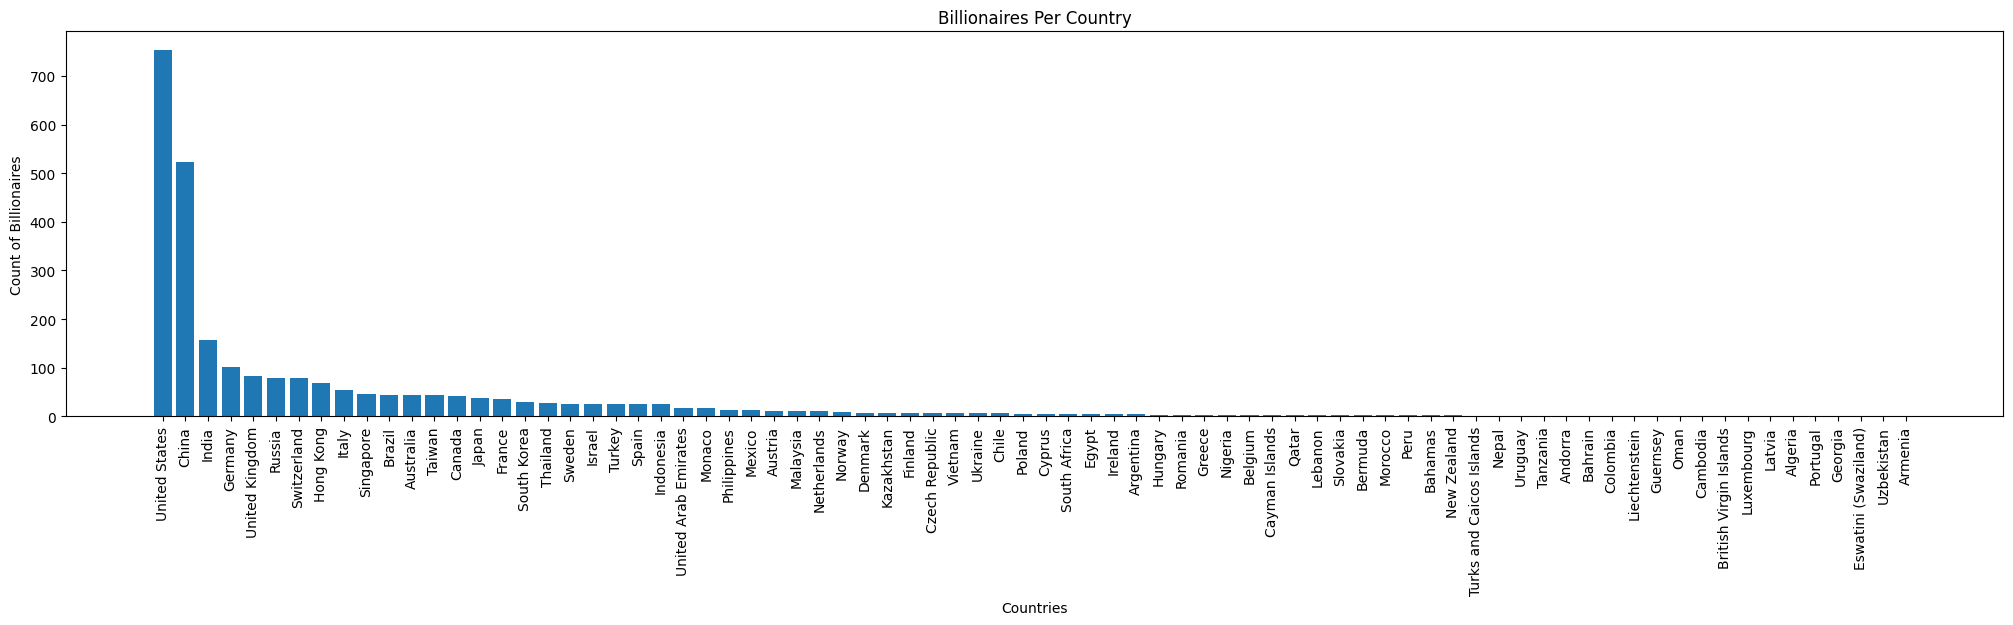

In [11]:
plt.figure(figsize=(25, 5))
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=90)
plt.title("Billionaires Per Country")
plt.xlabel("Countries")
plt.ylabel('Count of Billionaires')
plt.show()

In [12]:
country_unique = billionaire_df['country'].unique()
print(country_unique)

['France' 'United States' 'Mexico' 'India' 'Spain' 'China' 'Canada'
 'Germany' 'Switzerland' 'Belgium' 'Hong Kong' 'Austria' 'Japan'
 'United Kingdom' 'Australia' 'Indonesia' 'United Arab Emirates' 'Russia'
 'Chile' 'Monaco' 'Czech Republic' 'Sweden' nan 'Thailand' 'Uzbekistan'
 'Singapore' 'Nigeria' 'Israel' 'Italy' 'South Africa' 'Brazil' 'Malaysia'
 'South Korea' 'New Zealand' 'Philippines' 'Taiwan' 'Norway' 'Egypt'
 'Denmark' 'Eswatini (Swaziland)' 'Colombia' 'Netherlands' 'Poland'
 'Bahamas' 'Ukraine' 'Cayman Islands' 'Greece' 'Turkey' 'Argentina'
 'Georgia' 'Portugal' 'Kazakhstan' 'Algeria' 'Vietnam' 'Latvia' 'Finland'
 'Bermuda' 'Luxembourg' 'British Virgin Islands' 'Cambodia' 'Lebanon'
 'Oman' 'Ireland' 'Cyprus' 'Guernsey' 'Liechtenstein'
 'Turks and Caicos Islands' 'Romania' 'Qatar' 'Uruguay' 'Nepal' 'Slovakia'
 'Morocco' 'Hungary' 'Tanzania' 'Bahrain' 'Peru' 'Andorra' 'Armenia']


In [13]:
country_pop = billionaire_df['population_country'].unique()
print(country_pop)

[6.70598870e+07 3.28239523e+08 1.26014024e+08 1.36641775e+09
 4.70767810e+07 1.39771500e+09 3.69919810e+07 8.31327990e+07
 8.57483200e+06 1.14840550e+07            nan 8.87706700e+06
 1.26226568e+08 6.68344050e+07 2.57666050e+07 2.70203917e+08
 9.77052900e+06 1.44373535e+08 1.89520380e+07 3.89640000e+04
 1.06697090e+07 1.02854530e+07 6.96255820e+07 3.35806500e+07
 5.70356900e+06 2.00963599e+08 9.05330000e+06 6.02973960e+07
 5.85582700e+07 2.12559417e+08 3.24473850e+07 5.17090980e+07
 4.84100000e+06 1.08116615e+08 5.34789600e+06 1.00388073e+08
 5.81855300e+06 5.03394430e+07 1.73328500e+07 3.79708740e+07
 4.43851550e+07 1.07163220e+07 8.34296150e+07 4.49387120e+07
 3.72038200e+06 1.02694170e+07 1.85139300e+07 4.30530540e+07
 9.64621060e+07 1.91278900e+06 5.52031400e+06 6.45397000e+05
 1.64865420e+07 6.85571300e+06 5.26653500e+06 1.19857500e+06
 3.80190000e+04 1.93565440e+07 2.83206700e+06 3.46173400e+06
 2.86087100e+07 5.45407300e+06 3.69105600e+07 9.76994900e+06
 5.80054630e+07 1.501635

In [14]:
country_pop_count = billionaire_df['population_country'].value_counts()
print(country_pop_count)

3.282395e+08    754
1.397715e+09    523
1.366418e+09    157
8.313280e+07    102
6.683440e+07     82
               ... 
1.648654e+07      1
6.453970e+05      1
3.358065e+07      1
1.912789e+06      1
2.957731e+06      1
Name: population_country, Length: 68, dtype: int64


### Creating Country-Centric Dataframe

The country data above needs to be restructured for me to use it the way I'd like.

Because the main dataframe ties all information to the individual billionaire, I'll create a second dataframe here that ties country statistics to the appropriate country.  This will allow me to do country comparisons.

In [15]:
# This is where I filter for country-specific values!

filter_df = pd.DataFrame(billionaire_df)

country_data_df = filter_df.drop_duplicates(subset='country')

country_pop = country_data_df[["country", 'population_country']]
country_pop_drop_nan = country_pop.dropna(subset=['country'])
alpha_country_pop = country_pop_drop_nan.sort_values(by='country')
print(alpha_country_pop)

             country  population_country
604          Algeria          43053054.0
2002         Andorra             77142.0
554        Argentina          44938712.0
2375         Armenia           2957731.0
51         Australia          25766605.0
...              ...                 ...
39    United Kingdom          66834405.0
1      United States         328239523.0
1654         Uruguay           3461734.0
121       Uzbekistan          33580650.0
650          Vietnam          96462106.0

[78 rows x 2 columns]


In [16]:
filter_df = pd.DataFrame(billionaire_df)

# Remove duplicate entries for countries
country_data_df = filter_df.drop_duplicates(subset='country')

# drop NaNs in 'country'
country_pop = country_data_df[["country", 'population_country']].dropna(subset=['country'])
total_tax_rate_df = filter_df[['country', 'total_tax_rate_country']].drop_duplicates().dropna(subset=['country'])
gdp_country_df = filter_df[['country', 'gdp_country']].drop_duplicates().dropna(subset=['country'])

# Sort by 'country' in alphabetical order
alpha_country_pop = country_pop.sort_values(by='country')
alpha_total_tax_rate_df = total_tax_rate_df.sort_values(by='country')
alpha_gdp_country_df = gdp_country_df.sort_values(by='country')

# Count of billionaires per country, sorted alphabetically by country
alpha_country_counts = billionaire_df['country'].value_counts().sort_index()

# Convert alpha_country_counts to DataFrame for merging
alpha_country_counts_df = alpha_country_counts.reset_index()
alpha_country_counts_df.columns = ['country', 'billionaire_count']

# Merge the DataFrames on the 'country' column
country_compare = pd.merge(alpha_country_pop, alpha_country_counts_df, on='country', how='left')
country_compare = pd.merge(country_compare, alpha_total_tax_rate_df, on='country', how='left')
country_compare = pd.merge(country_compare, alpha_gdp_country_df, on='country', how='left')

print(country_compare)


           country  population_country  billionaire_count  \
0          Algeria          43053054.0                  1   
1          Andorra             77142.0                  1   
2        Argentina          44938712.0                  4   
3          Armenia           2957731.0                  1   
4        Australia          25766605.0                 43   
..             ...                 ...                ...   
73  United Kingdom          66834405.0                 82   
74   United States         328239523.0                754   
75         Uruguay           3461734.0                  1   
76      Uzbekistan          33580650.0                  1   
77         Vietnam          96462106.0                  6   

    total_tax_rate_country           gdp_country  
0                     66.1     $169,988,236,398   
1                      NaN       $3,154,057,987   
2                    106.3     $449,663,446,954   
3                     22.6      $13,672,802,158   
4           

In [17]:
# when I went to calcultae GDP per capita, I ran into erros.  seems this variable was stored as a string object
print(country_compare.dtypes)

country                    object
population_country        float64
billionaire_count           int64
total_tax_rate_country    float64
gdp_country                object
dtype: object


In [18]:
# this converts the gdp_country variable into a numeric type I can operate on

country_compare['gdp_country'] = country_compare['gdp_country'].str.replace(',', '')
country_compare['gdp_country'] = country_compare['gdp_country'].str.replace('$', '')
country_compare['gdp_country'] = pd.to_numeric(country_compare['gdp_country'], errors='coerce')

print(country_compare.dtypes)


country                    object
population_country        float64
billionaire_count           int64
total_tax_rate_country    float64
gdp_country               float64
dtype: object


<ipython-input-18-af8945db451d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  country_compare['gdp_country'] = country_compare['gdp_country'].str.replace('$', '')


In [19]:
# find the proportion of billionaires to total population in a given country

country_compare['prop_of_bill'] = country_compare['billionaire_count'] / country_compare['population_country']

# find GDP per capita

country_compare['gdp_per_capita'] = country_compare['gdp_country'] / country_compare['population_country']

print(country_compare)

           country  population_country  billionaire_count  \
0          Algeria          43053054.0                  1   
1          Andorra             77142.0                  1   
2        Argentina          44938712.0                  4   
3          Armenia           2957731.0                  1   
4        Australia          25766605.0                 43   
..             ...                 ...                ...   
73  United Kingdom          66834405.0                 82   
74   United States         328239523.0                754   
75         Uruguay           3461734.0                  1   
76      Uzbekistan          33580650.0                  1   
77         Vietnam          96462106.0                  6   

    total_tax_rate_country   gdp_country  prop_of_bill  gdp_per_capita  
0                     66.1  1.699882e+11  2.322716e-08     3948.343279  
1                      NaN  3.154058e+09  1.296311e-05    40886.391162  
2                    106.3  4.496634e+11  8.9010

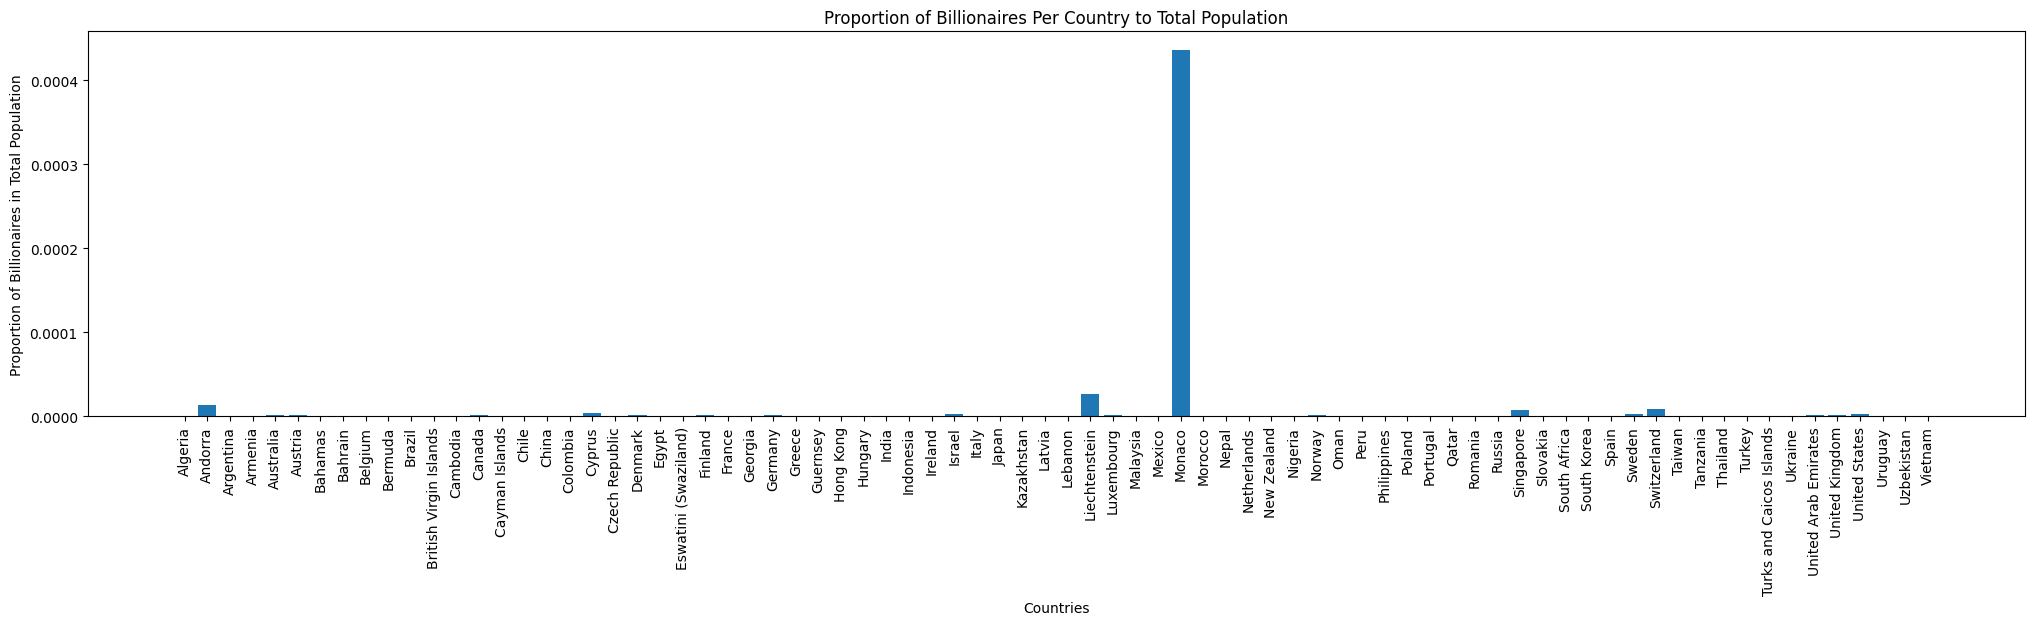

In [20]:
plt.figure(figsize=(25, 5))
plt.bar(country_compare["country"], country_compare['prop_of_bill'])
plt.xticks(rotation=90)
plt.title("Proportion of Billionaires Per Country to Total Population")
plt.xlabel("Countries")
plt.ylabel('Proportion of Billionaires in Total Population')
plt.show()

## Self-Made

In [21]:
billionaire_df['status'].value_counts()

D                       1223
U                        855
E                        268
N                        150
Split Family Fortune      79
R                         65
Name: status, dtype: int64

In [22]:
self_made_bill = billionaire_df[(billionaire_df['selfMade'] == True)]
trust_fund_bb = billionaire_df[(billionaire_df['selfMade'] == False)]

count_self_made_bill = len(self_made_bill)
count_trust_fund_bb = len(trust_fund_bb)

print(count_self_made_bill, count_trust_fund_bb)


1812 828


In [23]:
self_made_bill_cc = self_made_bill['country'].value_counts()
trust_fund_bb_cc = trust_fund_bb['country'].value_counts()

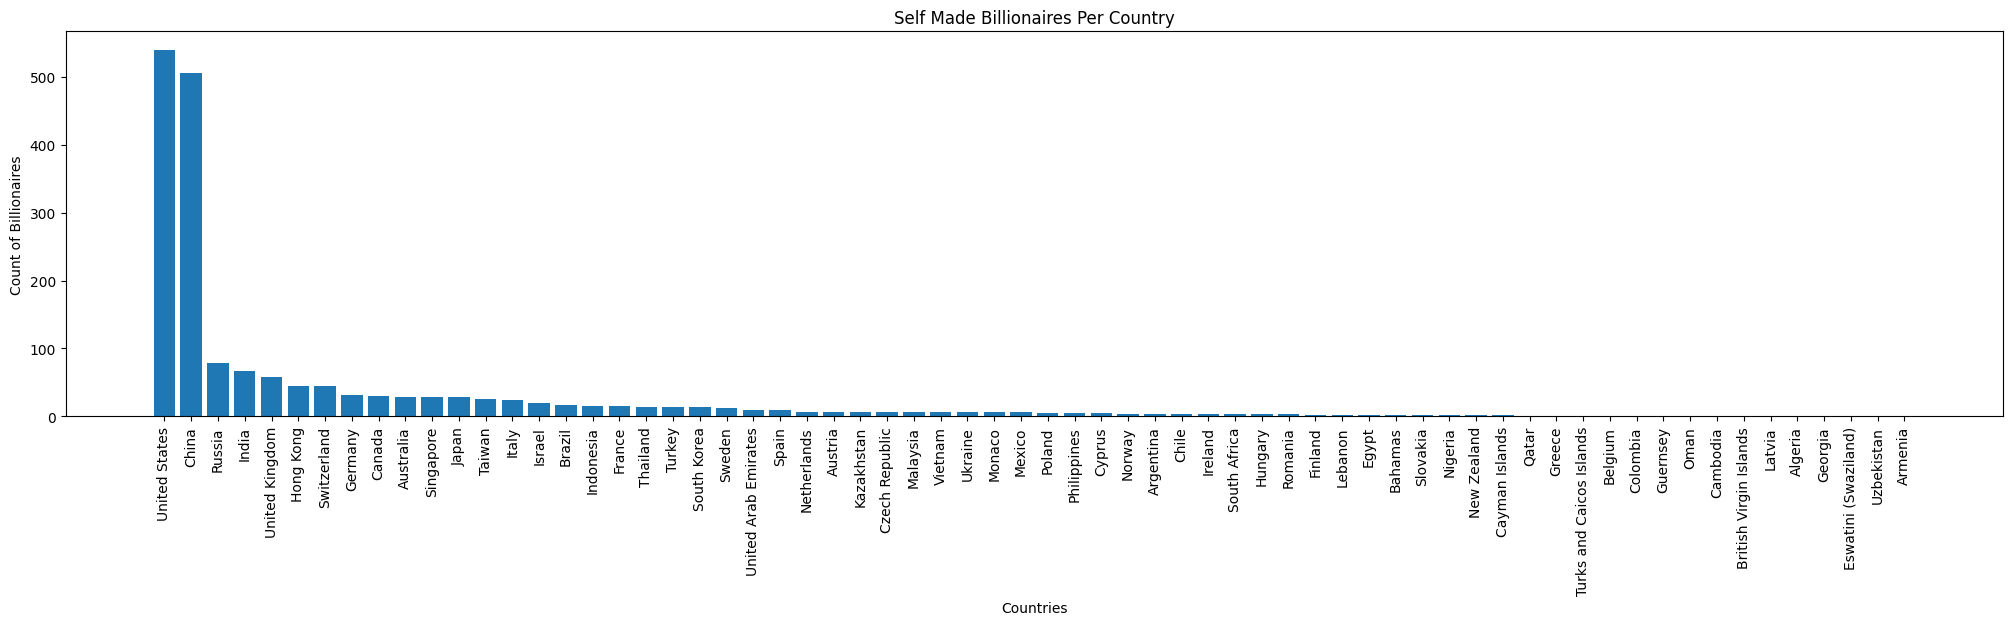

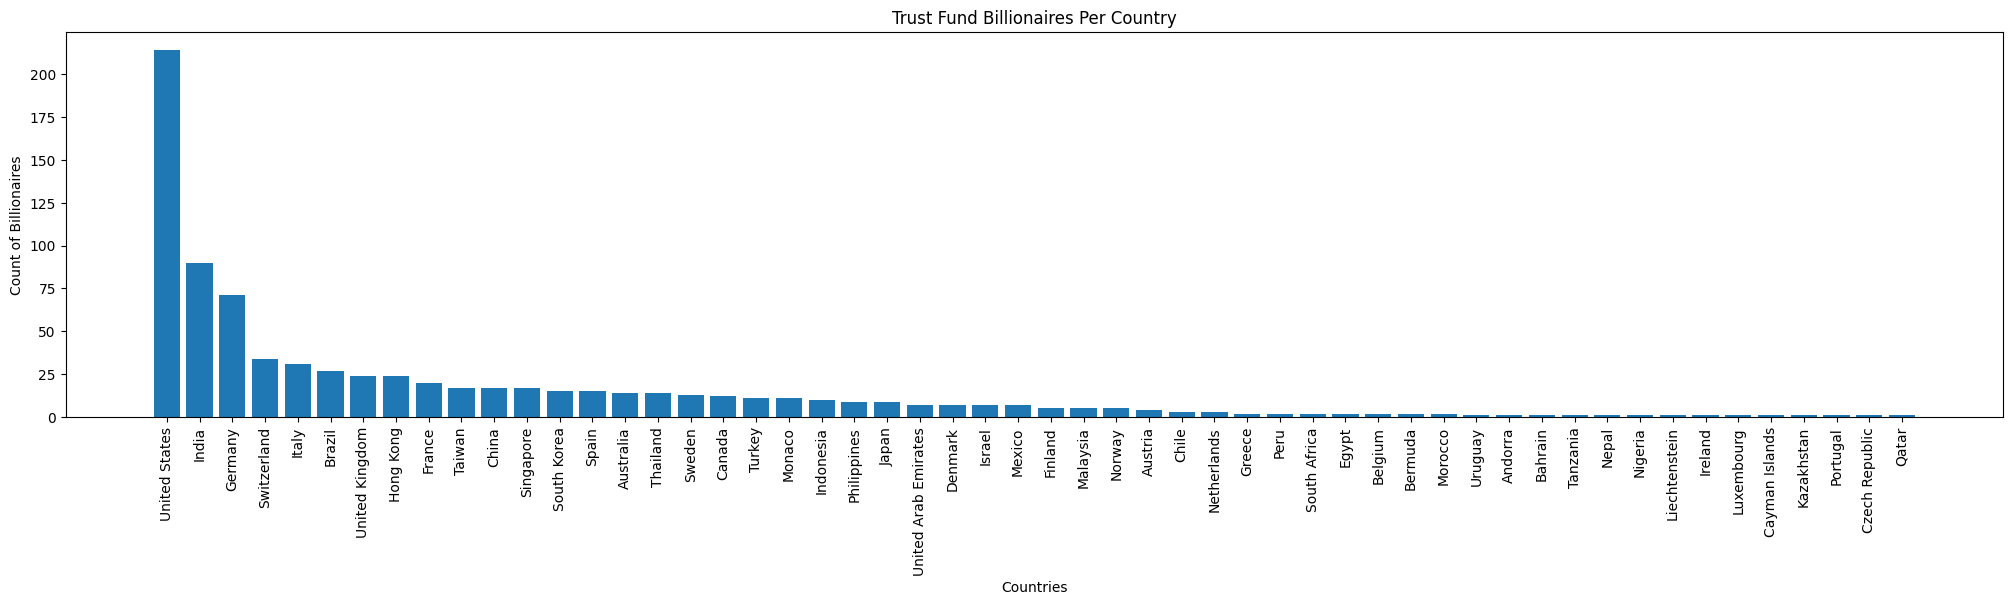

In [24]:
plt.figure(figsize=(25, 5), alpha = 0.5)
plt.bar(self_made_bill_cc.index, self_made_bill_cc.values)
plt.title("Self Made Billionaires Per Country")
plt.xlabel("Countries")
plt.ylabel('Count of Billionaires')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(25, 5), alpha = 0.5)
plt.bar(trust_fund_bb_cc.index, trust_fund_bb_cc.values)
plt.title("Trust Fund Billionaires Per Country")
plt.xlabel("Countries")
plt.ylabel('Count of Billionaires')
plt.xticks(rotation=90)
plt.show()

# Hypothesis Testing

A note on project design:

While the mean is less resistent to outliers, this project is a study focused on outliers.  For this reason, it seemed particularly important that all tests consider the full scope of the outliers in question, utilizing the mean rather than a more resistant measure.

## 1. Chance Model

### Monaco's Total Tax Rate: Significantly Lower?

Initial exploration of the data revealed that Monaco, a country I'd never even heard of before, has the highest proportion of billionaires.  This ran completely counter to my expectations.  For years, I've heard Americans cite the statistic that the United States has more billionaires than any other country, often pointing to this as an indicator of wealth disparity.  While America does have the highest total number of billionaires in the world, but self-made and not self-made, it's proportion of billionaires compared to the general population is quite unremarkable.  This begs the question, "What's so remarkable about Monaco?" Furthermore, is this difference in proportion of billionaires actually statistically significant?



Some cursory research reveals that Monaco is in fact, by area, the second-smallest country in the world.  Despite, or perhaps in part because of this, Monaco is also the most densely populated country in the world.  This information intrigued me further.  Reviewing the data available, and putting myself in the position of a billionaire, I decided to explore whether Monaco might have a particularly low total tax rate.

In [25]:
monaco = country_compare[country_compare['country'] == "Monaco"]
print(monaco)

   country  population_country  billionaire_count  total_tax_rate_country  \
44  Monaco             38964.0                 17                     NaN   

     gdp_country  prop_of_bill  gdp_per_capita  
44  7.184844e+09      0.000436   184396.986783  


Wow!  Upon further research, Monaco does not impose any form of individual income tax and has similarly favorable tax laws for corporations, explaining this NaN value.  This could help explain their higher than usual billionaire population proportion.

In [26]:
nan_indices = np.where(pd.isna(country_compare['total_tax_rate_country']))[0]
print(nan_indices)

[ 1  6  9 11 14 22 28 29 33 44 66 70]


Or, perhaps not. It turns out that a decent number of countries are acting as tax shelters for the rich.  That's fascinating.  So, taxes might be one reason Monaco has a higher proportion of billionaires, but it doesn't tell the full story.  Perhaps there's something else about this country described in the data that sets it apart from other countries.

What about Monaco's GDP per capita?

### Additional Exploration of Monaco: Per Capita GDP

In [27]:
# double checking Monaco's GDP data is listed before getting started

monaco_idx = np.where(country_compare['country'] == "Monaco")[0]
print(monaco_idx)

[44]


In [28]:
nan_indices = np.where(pd.isna(country_compare['gdp_country']))[0]
print(nan_indices)

# While a few data points are missing, I don't believe this will significantly affect the outcome of this experiement
# and have chosen to proceed.  Monaco does in fact have GDP data.

[ 6  9 11 14 22 28 29 33 66 70]


This Chance Model compares the "gdp_per_capita" variable for Monaco to the average all other countries in the dataset.

The Null Hypothesis is that there is no statistically significant difference in Monaco's GDP Per Capita compared to the average GDP Per Capita of all other countries.

The Alternative Hypothesis is that Monaco's GDP Per Capita is significantly higher than the average total tax rate of all other countries.

The test statistic chosen for this Chance model was the z-score.

For this Chance Model I have selected a 99% Confidence Level and a 0.01 significance level.


In [29]:
# identify my observed value

monaco_gdp_per_capita = monaco['gdp_per_capita'].iloc[0]
print(monaco_gdp_per_capita)

184396.98678267119


In [30]:
# dropping the NaN values above since I've done some research and couldn't find any countries with a $0 GDP
# The lowest GDP I found was Nauru clocking in at $133.2 million
# Dropping these NaNs to make sure they don't skew anything with the data

gdp_per_capita = country_compare[['country', 'gdp_per_capita']].dropna(subset=['gdp_per_capita'])
print(len(gdp_per_capita))
print(gdp_per_capita.isna().sum())

68
country           0
gdp_per_capita    0
dtype: int64


In [31]:
# calculate the avg GDP per capita
avg_gdp_per_capita = gdp_per_capita['gdp_per_capita'].mean()
print(avg_gdp_per_capita)

30498.888901007358


In [32]:
#calculate the standard deviation
std_avg_gdp_per_capita = country_compare['gdp_per_capita'].std()
print(std_avg_gdp_per_capita)

35142.90636851648


In [33]:
#simulate the distribution
avg_gdp_per_capita_dist = norm(loc = avg_gdp_per_capita, scale = std_avg_gdp_per_capita)

#generate 10,000 random variables
#we are doing the billionaire dataset after all!
sample = avg_gdp_per_capita_dist.rvs(size = 10000)

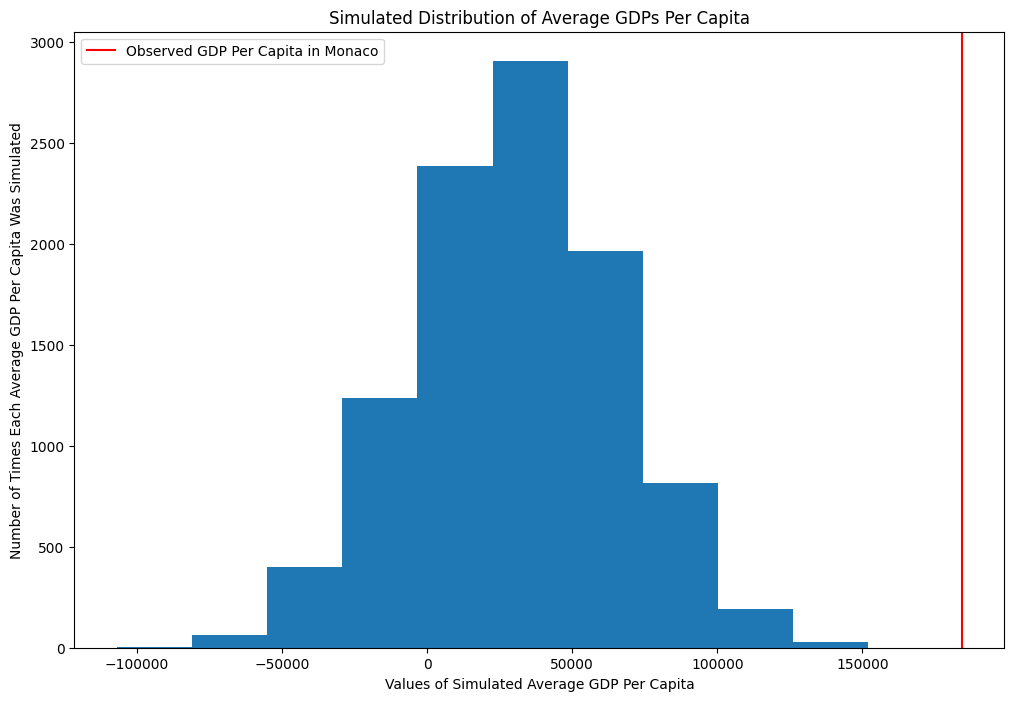

In [34]:
plt.figure(figsize=(12, 8))
plt.hist(sample)
plt.title("Simulated Distribution of Average GDPs Per Capita")
plt.xlabel("Values of Simulated Average GDP Per Capita")
plt.ylabel("Number of Times Each Average GDP Per Capita Was Simulated")
plt.axvline(x = monaco_gdp_per_capita, c = "r", label = "Observed GDP Per Capita in Monaco")
plt.legend()
plt.show()

Wow!  Look at how far to the right the observed value is compared to the simulated averages!  While it seems pretty clear Monaco is an outlier here, let's finish the tests to be sure.

In [35]:
sample_mean = np.mean(sample)
print(sample_mean)

30025.30602008191


In [36]:
sample_stddev = sample.std()
print(sample_stddev)

35025.26219048055


In [37]:
# use the sample mean and sample standard deviation to compute the z-score test stat
z_score = (monaco_gdp_per_capita - sample_mean) / sample_stddev
print(z_score)

4.407438263361399


In [38]:
# and from there calculate the p-value
p_value = 1 - norm.cdf(z_score)
print(p_value)

5.2300200790167395e-06


What a low p-value.  Based on these results, I can say with 99% confidence that I reject the null hypothesis.  The per capita GDP of Monaco is statistically significantly higher than the average per capita GDP of other countries, under 10,000 simulations of this Chance Model.

What this data can't do however is establish causality.  Do we have a real chicken and the egg situation on our hands?  Is Monaco home to so many billionaires because of its significantly high per capita GDP?  Or is the per capita GDP so high due to the presence of these billionaires?  Or, is this phenomenon due to an entirely unreleated characteristic of Monaco not capture by this dataset? That is certainly not a question that can be answered by this project, but would be a fascinating place to direct future research...

## 2. Permutation Test

### Net Worth of Billionaires Based on "selfMade" Status

This permutation test compares the net worth of billionaires with "True" values for the "selfMade" variable to those with "False" values.

The Null Hypothesis is that there is no statistically significant difference in the average net worth of self-made billionaires and billionaires that were not self-made.

The Alternative Hypothesis is that billionaires who were not self-made have a higher average net-worth.

The chosen test statistic for this Permutation Test is the difference between two means.

This is calculated as: average finalWorth of trust_fund_bb - average finalWorth of self_made_bill

For this experiement, a test statistic closer to zero or less than zero favors the null and indicates no difference in net worth, or a difference favoring self-made billionaires, respectively.  Alternatively, a larger, positive value for the test statistic indicates support for the alternative hypothesis.

In this Permutation test, a 95% confidence level was chosen, corresponding to a 0.05 significance level.

In [39]:
# find each group's average wealth

self_made_bill_worth = self_made_bill["finalWorth"].mean()
trust_fund_bb_worth = trust_fund_bb["finalWorth"].mean()

print(self_made_bill_worth, trust_fund_bb_worth)

4465.397350993378 4970.410628019324


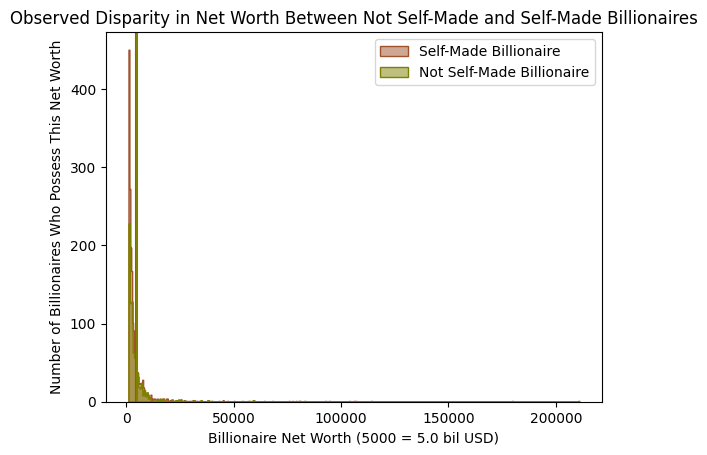

In [40]:
sns.histplot(data = self_made_bill, x = "finalWorth", label = 'Self-Made Billionaire', color = "sienna", alpha = 0.5, element="step")
sns.histplot(data = trust_fund_bb, x = "finalWorth", label = 'Not Self-Made Billionaire', color = "olive", alpha = 0.5, element="step")
plt.axvline(x = self_made_bill_worth, color = "sienna")
plt.axvline(x = trust_fund_bb_worth, color = "olive")
plt.title('Observed Disparity in Net Worth Between Not Self-Made and Self-Made Billionaires')
plt.xlabel("Billionaire Net Worth (5000 = 5.0 bil USD)")
plt.ylabel("Number of Billionaires Who Possess This Net Worth")
plt.legend()
plt.show()

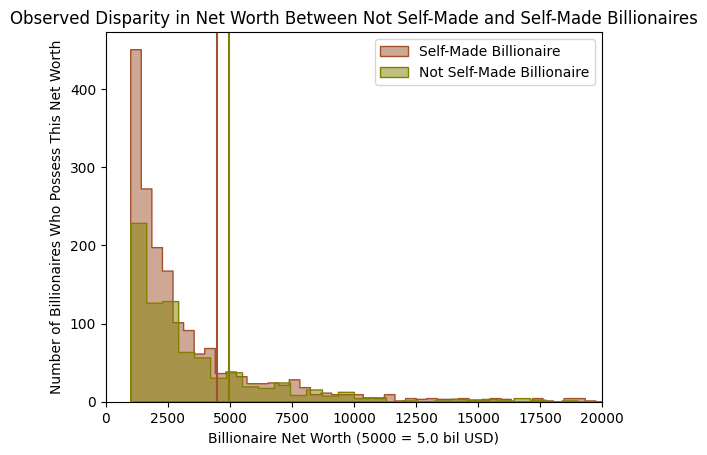

In [41]:
sns.histplot(data = self_made_bill, x = "finalWorth", label = 'Self-Made Billionaire', color = "sienna", alpha = 0.5, element="step")
sns.histplot(data = trust_fund_bb, x = "finalWorth", label = 'Not Self-Made Billionaire', color = "olive", alpha = 0.5, element="step")
plt.axvline(x = self_made_bill_worth, color = "sienna")
plt.axvline(x = trust_fund_bb_worth, color = "olive")
plt.title('Observed Disparity in Net Worth Between Not Self-Made and Self-Made Billionaires')
plt.xlabel("Billionaire Net Worth (5000 = 5.0 bil USD)")
plt.ylabel("Number of Billionaires Who Possess This Net Worth")
plt.legend()
plt.xlim(0, 20000)
plt.show()

In [58]:
# define a function to compute the test statistic

def compute_test_stat(trust_fund_bb_worth1, self_made_bill_worth2):
    test_stat = trust_fund_bb_worth1 - self_made_bill_worth2
    return test_stat

In [59]:
#set the observed value of the test stat

ov_selfMade_net_worth = compute_test_stat(trust_fund_bb_worth, self_made_bill_worth)
print(ov_selfMade_net_worth)

505.0132770259461


In [60]:
# build the array of net worth values
all_bill_net_worth = np.array(billionaire_df['finalWorth'].values)
print(all_bill_net_worth)

[211000 180000 114000 ...   1000   1000   1000]


In [61]:
# and now a paired array for selfMade status
all_bill_selfMade_TF = np.array(billionaire_df['selfMade'].values)
print(all_bill_selfMade_TF)

[False  True  True ...  True  True False]


In [46]:
# confirmation that these are the same length
if(len(all_bill_net_worth) == len(all_bill_selfMade_TF)):
  print("true")

true


In [62]:
# complete one round random selfMade status draw
selfMade_status = [True, False]
sim_bill_selfMade_status = np.random.choice(selfMade_status, len(all_bill_net_worth))

In [63]:
# confirm this worked
print(sim_bill_selfMade_status)
print(all_bill_net_worth)

[False False  True ... False False False]
[211000 180000 114000 ...   1000   1000   1000]


In [64]:
# now that we know it works, write a function
# function for simulating one trial
def compute_stat_one_trial(bill_selfMade_status, all_bill_net_worth):

  #separate based on sim selfMade status
  sim_trust_fund_bb_nw = all_bill_net_worth[bill_selfMade_status == False]
  sim_self_made_bill_nw = all_bill_net_worth[bill_selfMade_status == True]

  #average the net worth for each status
  avg_trust_fund_bb_nw = np.average(sim_trust_fund_bb_nw)
  avg_self_made_nw = np.average(sim_self_made_bill_nw)

  #call funciton to compute test stat
  test_stat = compute_test_stat(avg_trust_fund_bb_nw, avg_self_made_nw)
  return test_stat

In [65]:
#call function to compute one trial
compute_stat_one_trial(sim_bill_selfMade_status, all_bill_net_worth)

499.9713023015556

In [66]:
# simulate 10,000 test stats
n = 10000
test_stat_array = []

for i in range(n):
  sim_bill_selfMade_status = np.random.choice(selfMade_status, len(all_bill_net_worth))
  stat = compute_stat_one_trial(sim_bill_selfMade_status, all_bill_net_worth)
  test_stat_array.append(stat)

In [67]:
# print array of test stats, make sure things worked
test_stat_array = np.array(test_stat_array)
test_stat_array

array([ 287.02850344,  383.32290757, -137.5458396 , ..., -416.40271656,
        547.51305745,  442.22538246])

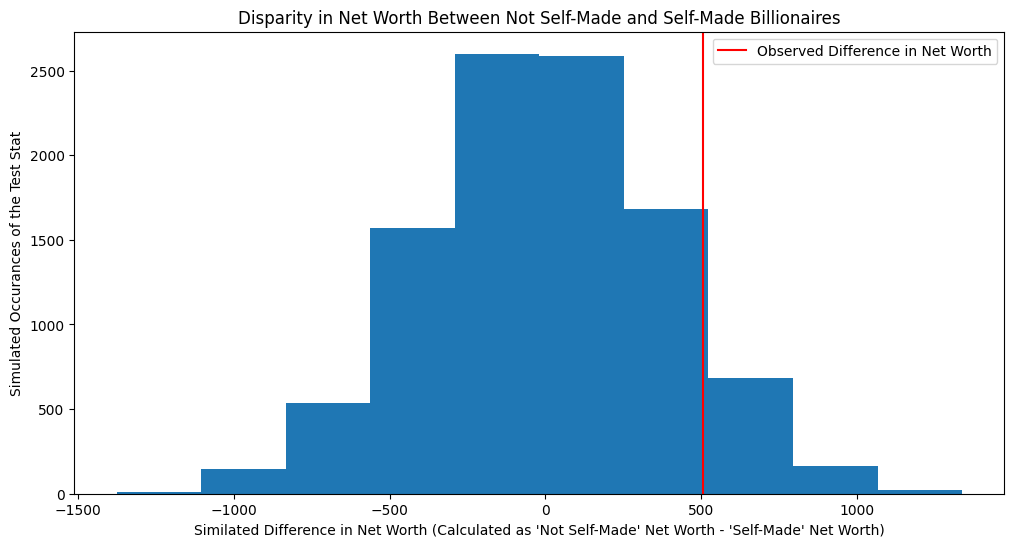

In [68]:
plt.figure(figsize=(12, 6))
plt.hist(test_stat_array)
plt.axvline(x = ov_selfMade_net_worth, c = 'r', label = 'Observed Difference in Net Worth')
plt.title('Disparity in Net Worth Between Not Self-Made and Self-Made Billionaires')
plt.xlabel("Similated Difference in Net Worth (Calculated as 'Not Self-Made' Net Worth - 'Self-Made' Net Worth)")
plt.ylabel("Simulated Occurances of the Test Stat")
plt.legend()
plt.show()

The observed value is within the differences in net worth generated under 10,000 simulations.  So, was this observed difference in net worth statistically significant?

In [69]:
empirical_p = np.count_nonzero(test_stat_array >= ov_selfMade_net_worth) / n
print(empirical_p)

0.0954


At the 95% confidence level, there is insufficient evidence to reject the null hypothesis that the average net worth is similar between self-made and not self-made billionaires.

However, while I cannot reject the null at the 95% confidence level due to a p-value greater than 0.05, it is worth noting that this is still a relatively low p-value.  If I had chosen a 90% confidence level for this permutation test, this result would allow me to reject the null hypothesis and conclude a statistically significant difference in the net worth of self-made and not self-made billionaires, with those who are not self-made having higher net worths, on average.

## 3. Bootstrapped Confidence Interval

I'm still fascinated by Monaco, so let's take one last look at it for this Bootstrapped Confidence Interval.  

0 tax coungtries vs. tax

# Additional Stuff

Down below lives some code that didn't fit into the overall scope of the final project.  However, it was still interesting and I didn't quite have the heart to delete it.  It lives on here for future perusal.

### Self-Made older/younger than not self-made?

self_made_bill

trust_fund_bb

In [24]:
# find their average ages

self_made_bill_age = self_made_bill["age"].mean()
trust_fund_bb_age = trust_fund_bb["age"].mean()

print(self_made_bill_age, trust_fund_bb_age)

64.69574944071589 66.14993646759848


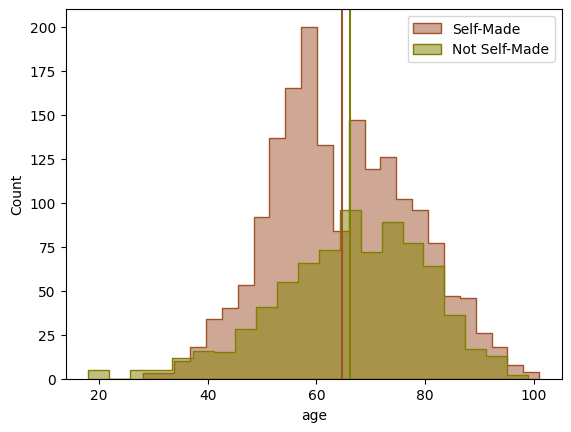

In [25]:
sns.histplot(data = self_made_bill, x = "age", label = 'Self-Made', color = "sienna", alpha = 0.5, element="step")
sns.histplot(data = trust_fund_bb, x = "age", label = 'Not Self-Made', color = "olive", alpha = 0.5, element="step")
plt.axvline(x = self_made_bill_age, color = "sienna")
plt.axvline(x = trust_fund_bb_age, color = "olive")
plt.legend()